In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
# Read dataset. While reading make date column index and parse date column as timestamp.
dataframe = pd.read_csv("assignment.csv", parse_dates=['date'], index_col="date")

In [3]:
# Let's take an overview to dataset
dataframe.head(10)

,daily worker count
date,
2013-01-24,1
2013-01-25,1
2013-01-26,1
2013-01-27,2
2013-01-29,1
2013-01-31,3
2013-01-02,4
2013-03-02,2
2013-04-02,5


In [4]:
# Index is not sorted. Sort the index.
dataframe = dataframe.sort_index()

In [5]:
# Let's see if dataframe index is sorted?
dataframe.head(10)

,daily worker count
date,
2013-01-02,4
2013-01-03,4
2013-01-04,5
2013-01-05,4
2013-01-06,4
2013-01-07,9
2013-01-08,22
2013-01-09,20
2013-01-10,20


Yes. It is sorted now.

In [6]:
# Change column names. We don't want blanks in column names.
# Create new python list for new column names
column_names = ['daily_worker_count']

# Assign newly created column names list to dataframe columns
dataframe.columns = column_names

## Graphical overview of timeseries

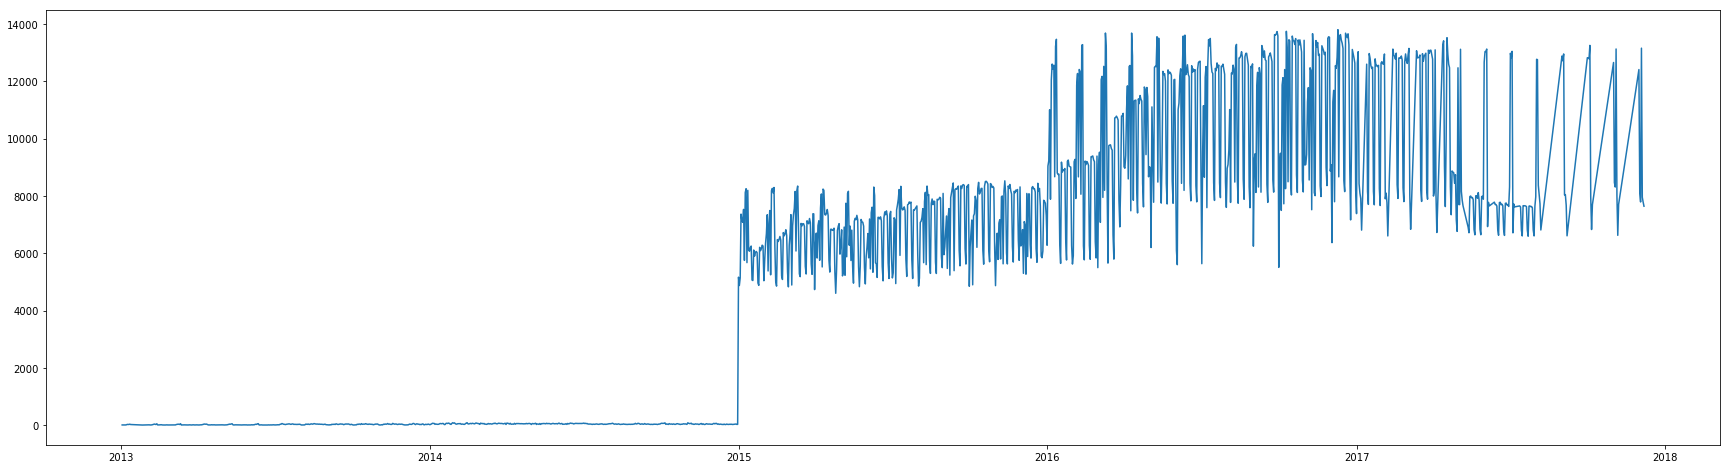

In [7]:
# Convert dataframe to pandas series but with different name than original dataframe
dataframe_pd_series = dataframe['daily_worker_count']

# Declare the plot size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 8

# Plot time series
plt.plot(dataframe_pd_series)
plt.show()

In [8]:
# Extract some new features from dataframe index(datetimeindex)
# We create three new features 
dataframe['year'] = dataframe.index.year
dataframe['day_of_month'] = dataframe.index.day
dataframe['month'] = dataframe.index.month
dataframe['day_of_week'] = dataframe.index.dayofweek
dataframe['quarter'] = dataframe.index.quarter

In [9]:
# See if new features has properly created
dataframe.head()

,daily_worker_count,year,day_of_month,month,day_of_week,quarter
date,,,,,,
2013-01-02,4,2013,2,1,2,1
2013-01-03,4,2013,3,1,3,1
2013-01-04,5,2013,4,1,4,1
2013-01-05,4,2013,5,1,5,1
2013-01-06,4,2013,6,1,6,1


In [10]:
# Check outliers in year, month and day
print("max month:", dataframe.month.max())
print("min month:", dataframe.month.min())
print("max year:", dataframe.year.max())
print("min year:", dataframe.year.min())
print("max day of month:", dataframe.day_of_month.max())
print("min day of month:", dataframe.day_of_month.min())
print("max day of week:", dataframe.day_of_week.max())
print("min day of week:", dataframe.day_of_week.min())

max month: 12
min month: 1
max year: 2017
min year: 2013
max day of month: 31
min day of month: 1
max day of week: 6
min day of week: 0


There is no outliers in terms of date derieved columns.

In [11]:
# Split columns into features and target values
X = dataframe.iloc[:, 1:].values
y = dataframe.iloc[:, 0].values

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
X.shape

(1647, 5)

In [13]:
y.shape

(1647,)

In [14]:
X_train.shape

(1317, 5)

In [15]:
y_train.shape

(1317,)

In [16]:
X_test.shape

(330, 5)

In [17]:
y_test.shape

(330,)

# Buid and train model

In [18]:
# Prepare the parameters
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

# Create GradientBoostingRegressor object with parameters
clf = ensemble.GradientBoostingRegressor(**params)

# Train GradientBoostingRegressor object with train set
clf.fit(X_train, y_train)

# Test the model with test set and  compute mean square error (mse)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)


MSE: 1136648.1641


In [19]:
# Make predictions by using trained model. 
y_pred = clf.predict(X_test)

In [20]:
# Compare daily_worker_count predictions with real ones and compute R square
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.95096560821122433

In [21]:
y_pred2 = clf.predict(X)

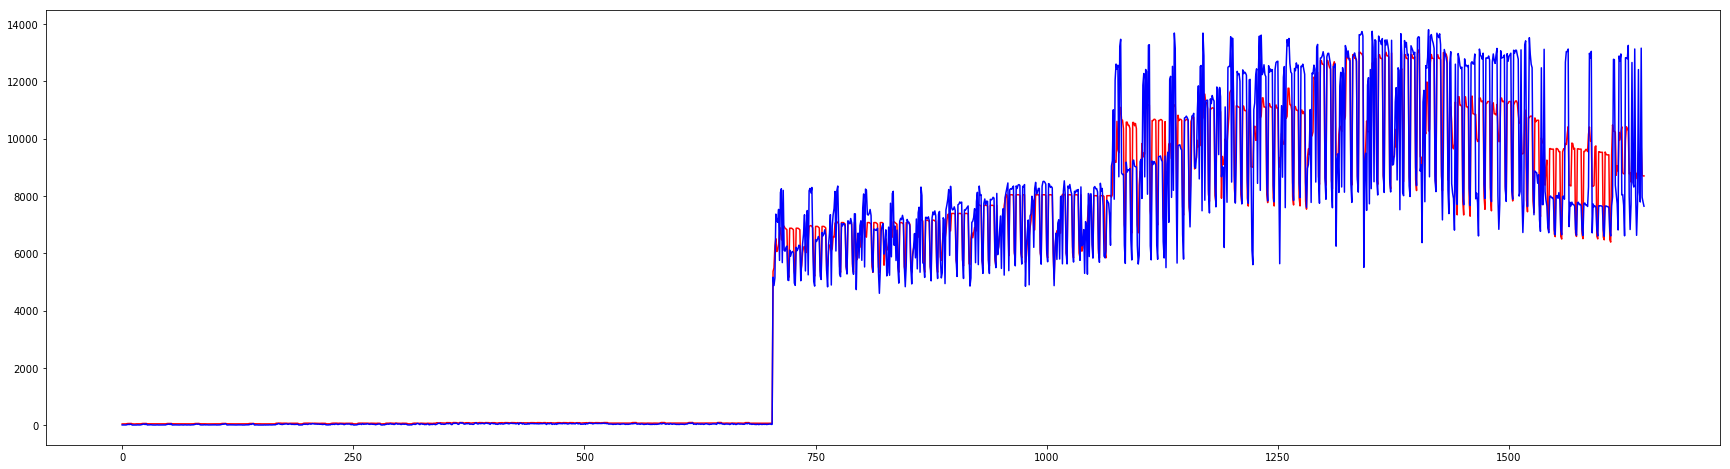

In [24]:
plt.plot(y_pred2, color='red')
plt.plot(y, color='blue')
plt.show()

In [122]:
dataframe.columns

Index(['daily_worker_count', 'year', 'day_of_month', 'month', 'day_of_week',
       'quarter'],
      dtype='object')

In [123]:
dataframe2 = dataframe
dataframe2.drop('daily_worker_count',axis=1, inplace=True)

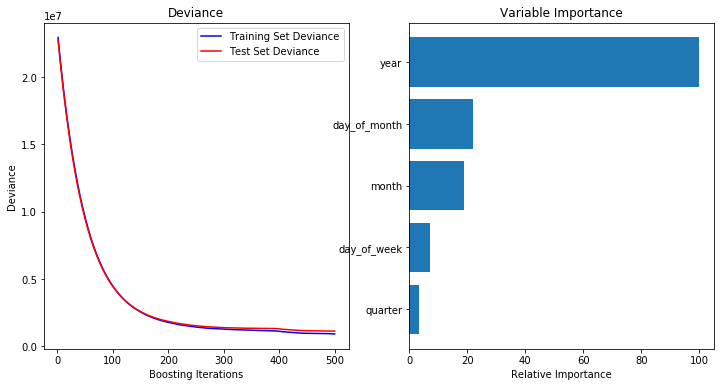

In [124]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, dataframe2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()